<a href="https://colab.research.google.com/github/solharsh/NLP/blob/master/Twitter_Sentiment_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tweepy
consumer_key="hmL3tbCl4Y7JgpKsDHKCpTEm9"
consumer_secret="zGJXewHINvlNE7ViTA10YuGsjZcOJamA1dgdF3V2aN0uF54zc2"
access_token="741301816361635840-p46wy3cSUEfuoozXvYNDvrfhpQjjt07"
access_token_secret="Edvzh6AN9KZdZtIClohE1K3KWPMlzY8u3rRRRxKJn8ztW"

In [0]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [0]:
api=tweepy.API(auth)
user=api.user_timeline(screen_name="narendramodi")

In [0]:
tmpp=[]
tweets_for_csv =[tweet.text for tweet in user] # CSV file created  
for j in tweets_for_csv:
        tmpp.append(j)

In [0]:
import numpy as nm
# Cleaning Spaces from each and every tweets
for  i in range(len(tmpp)):
     tmpp[i]=tmpp[i].replace('\n','')

In [26]:
import re

for i in range(len(tmpp)):
    x=re.compile(r'https://t.co/*[a-zA-Z0-9]*',re.DOTALL)
    tmpp[i]=re.sub(x,'',tmpp[i])
    print(tmpp[i])

I look forward to your ideas and inputs for this month’s #MannKiBaat, which will take place on the 31st. You can:… 
Greetings to Union Minister Shri @TCGEHLOT Ji on his birthday. May Almighty bless him with a long and healthy life.
Birthday wishes to our former PM Shri @H_D_Devegowda Ji. Praying for his long life and good health.
यह गीत हर किसी को उत्साहित और प्रेरित करने वाला है। इसमें आत्मनिर्भर भारत के लिए सुरों से सजा उद्घोष है। 
Mazel Tov my friend @netanyahu for forming your fifth government in Israel. I wish you and @gantzbe success and loo… 
מזל טוב ידידי @netanyahu על הקמת הממשלה החמישית בישראל. אני מאחל לך ול@gantzbe הצלחה רבה ומצפה להמשך שיתוף פעולה הד… 
Measures and reforms announced by the FM today will have a transformative impact on our health and education sector… 
Important sectors such as coal, minerals, defence, aviation, space and atomic energy have been covered in the annou… 
Thank you @POTUS @realDonaldTrump. This pandemic is being fought collectively by all of us

In [27]:
for i in range(len(tmpp)):
    tmpp[i]=re.sub(r'@[a-zA-Z_.0-9]*| #[a-zA-Z0-9]*','',tmpp[i])
    print(tmpp[i])

I look forward to your ideas and inputs for this month’s, which will take place on the 31st. You can:… 
Greetings to Union Minister Shri  Ji on his birthday. May Almighty bless him with a long and healthy life.
Birthday wishes to our former PM Shri  Ji. Praying for his long life and good health.
यह गीत हर किसी को उत्साहित और प्रेरित करने वाला है। इसमें आत्मनिर्भर भारत के लिए सुरों से सजा उद्घोष है। 
Mazel Tov my friend  for forming your fifth government in Israel. I wish you and  success and loo… 
מזל טוב ידידי  על הקמת הממשלה החמישית בישראל. אני מאחל לך ול הצלחה רבה ומצפה להמשך שיתוף פעולה הד… 
Measures and reforms announced by the FM today will have a transformative impact on our health and education sector… 
Important sectors such as coal, minerals, defence, aviation, space and atomic energy have been covered in the annou… 
Thank you   This pandemic is being fought collectively by all of us. In such times, it’s a… 
Greetings on Sikkim’s Statehood Day. Home to talented and compassion

In [0]:
from textblob import TextBlob

In [29]:
po=[]
for i in range(len(tmpp)):
    analysis=TextBlob(tmpp[i])
    po.append(analysis.sentiment.polarity)
    print(po[i],tmpp[i])

0.0 I look forward to your ideas and inputs for this month’s, which will take place on the 31st. You can:… 
0.225 Greetings to Union Minister Shri  Ji on his birthday. May Almighty bless him with a long and healthy life.
0.21666666666666665 Birthday wishes to our former PM Shri  Ji. Praying for his long life and good health.
0.0 यह गीत हर किसी को उत्साहित और प्रेरित करने वाला है। इसमें आत्मनिर्भर भारत के लिए सुरों से सजा उद्घोष है। 
0.3 Mazel Tov my friend  for forming your fifth government in Israel. I wish you and  success and loo… 
0.0 מזל טוב ידידי  על הקמת הממשלה החמישית בישראל. אני מאחל לך ול הצלחה רבה ומצפה להמשך שיתוף פעולה הד… 
0.0 Measures and reforms announced by the FM today will have a transformative impact on our health and education sector… 
0.2 Important sectors such as coal, minerals, defence, aviation, space and atomic energy have been covered in the annou… 
0.0 Thank you   This pandemic is being fought collectively by all of us. In such times, it’s a… 
0.7 Greetings 

In [0]:
import pandas as pd
sentiment=pd.DataFrame(po,columns=["Polarity"])

In [31]:
senti=pd.DataFrame({'pol':po,'Tweets':tmpp},columns=["pol","Tweets"])
senti.head()

,pol,Tweets
0,0.000000,I look forward to your ideas and inputs for th...
1,0.225000,Greetings to Union Minister Shri Ji on his bi...
2,0.216667,Birthday wishes to our former PM Shri Ji. Pra...
3,0.000000,यह गीत हर किसी को उत्साहित और प्रेरित करने वाल...
4,0.300000,Mazel Tov my friend for forming your fifth go...


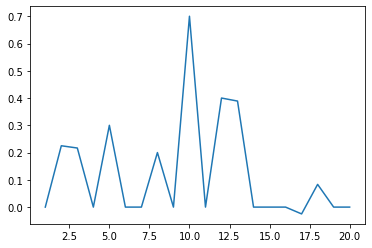

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
x_axis=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(x_axis, senti.pol)
plt.show()